<a href="https://colab.research.google.com/github/Chisato243/CMPINF0100_FinalProject/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE BEST NEIGHBORHOOD IN PITTSBURGH #

## Team 18 ##
Group Members:
* Vincent Zhu (viz18@pitt.edu)
* Brian Lee (brl219@gmail.com)
* Bairun Chen (bac128@pitt.edu)

### Introduction ###

By looking at the data provided by WPRDC, we decided to rank the best neighborhood in Pittsburgh based on their happiness. To do this we devised three submetrics to use.

* ratio of people per courts/rinks
* ratio of people per facilities
* ratio of people per park

We decided to use these three as metrics because they represent key factors that contribute to the overall happiness and well-being of residents. The availability of parks, courts/rinks, and other facilities provides opportunities for recreation, physical activity, and community engagement, which are essential components of a vibrant neighborhood. By analyzing the ratio of people to these resources, we aim to determine how well a neighborhood caters to its population's recreational needs.

In [ ]:
# imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Courts and Rinks
#### Vincent Zhu

First, we analyzed the number of courts and rinks that are in each neighborhood. Court and rinks are a great place for people to hang out and play sports which increases happiness and health. Using the data, we will find the number of population per court/rinks in each neighborhood with a lower population per court/rink meaning a higher happiness. Then we will rank the neighborhoods by the happiest neighborhood base on the scorings.

In [ ]:
# opens the data file for court/rinks in each neighborhood
courts = pd.read_csv("sample_data/CourtData.csv")
courts.head(5)

,_id,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305


The data above contains a lot of unnecessary information, so here it will only show the important datas we need.

In [ ]:
courts[['name', 'type', 'park', 'neighborhood']].head(10)

,name,type,park,neighborhood
0,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,Allegheny Center
1,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,Allegheny Center
2,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,Allegheny Center
3,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,Allegheny Center
4,Alton Park Basketball Court 1,Basketball (Half),Alton Park,Beechview
5,Alton Park Basketball Court 2,Basketball (Full),Alton Park,Beechview
6,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,Bedford Dwellings
7,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,Bedford Dwellings
8,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,South Side Slopes
9,Armstrong Park Basketball Court 1,Basketball (Full),Armstrong Park,South Side Flats


Now, we will print out the number of courts and rinks in each neighborhood in descending order.

In [ ]:
num_courts = courts.groupby('neighborhood')['park'].count().reset_index()
num_courts.columns = ['Neighborhood', 'Total Courts']
num_courts = num_courts.sort_values(by='Total Courts', ascending=False)

print(num_courts)

           Neighborhood  Total Courts
54  Squirrel Hill South            26
27        Highland Park            20
26            Hazelwood            10
5           Beltzhoover             9
9             Brookline             9
..                  ...           ...
41          Perry South             1
7               Bon Air             1
60           Upper Hill             1
1             Allentown             1
35          Middle Hill             1

[63 rows x 2 columns]


This doesn't clearly demonstrate all the data, so we will plot a bar graph to better visualize this new data.

Text(0.5, 1.0, 'Total Courts per Neighborhood')

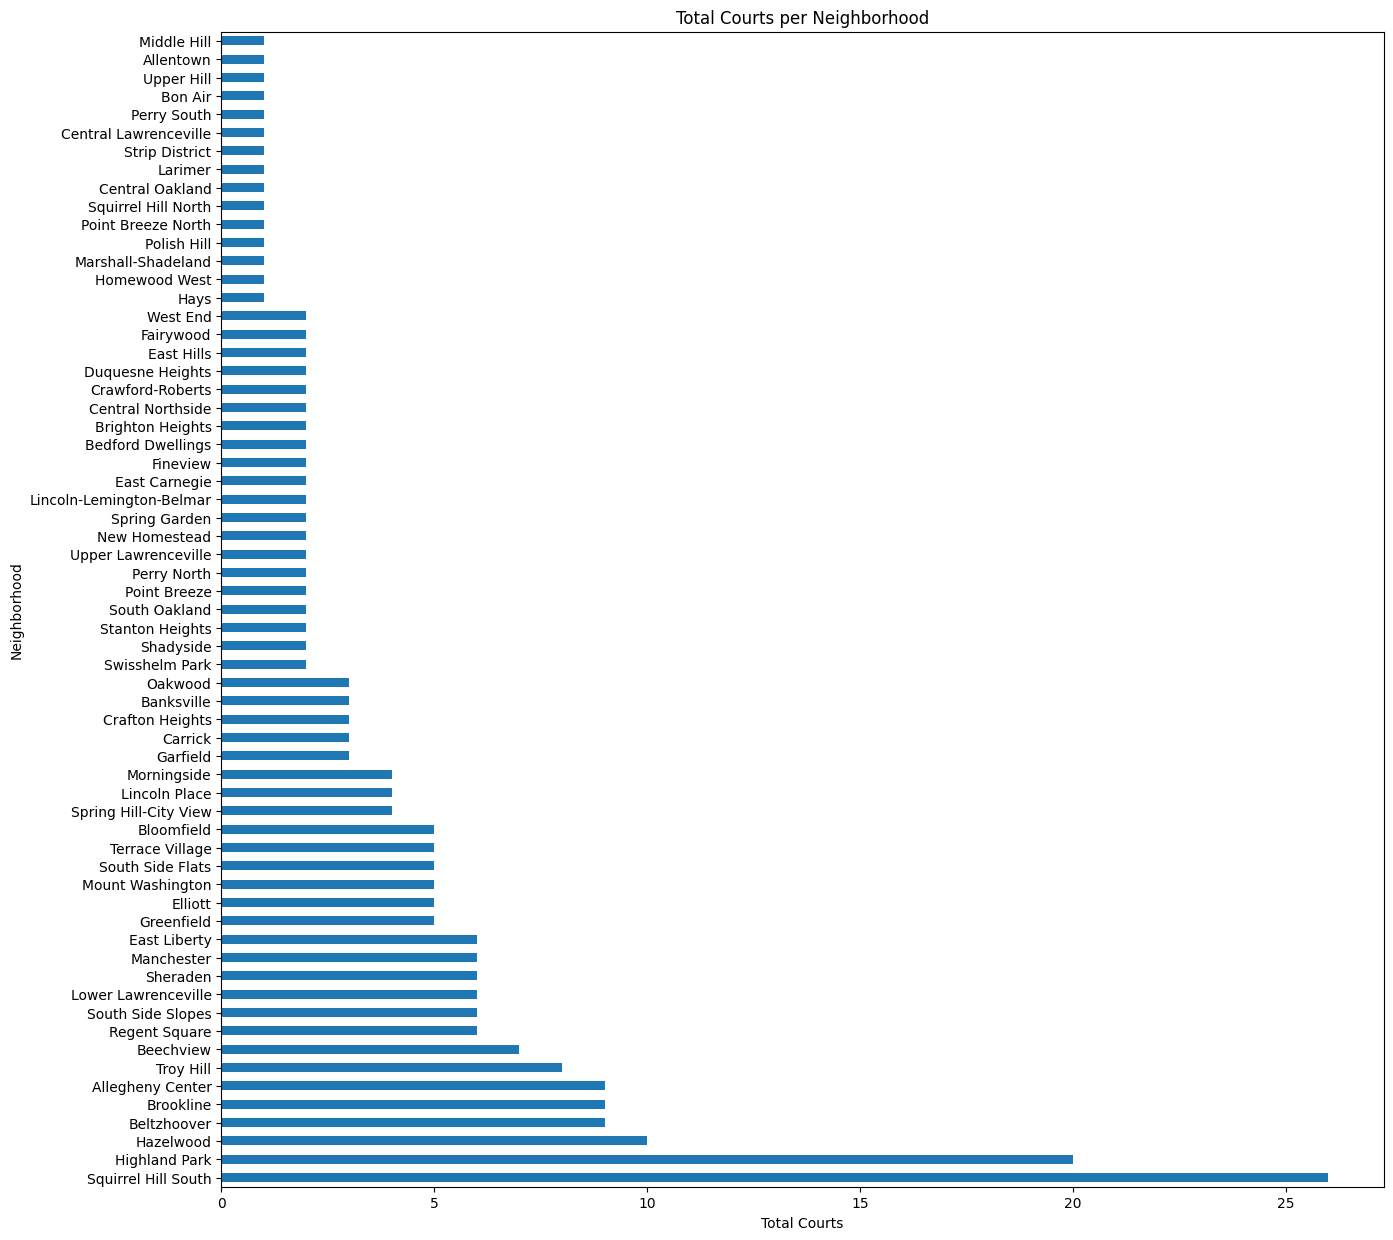

In [ ]:
graph = num_courts.plot.barh(x="Neighborhood", y="Total Courts", figsize=(15,15), legend=None)
plt.xlabel('Total Courts')
plt.title('Total Courts per Neighborhood')

Next, we will look at the populations in each neighborhood.

In [ ]:
# opens the data file for estimated population in each neighborhood
population = pd.read_csv("sample_data/population.csv")
population[['Neighborhood', 'Estimate; Total']].head(15)

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
5,Banksville,3858.0
6,Bedford Dwellings,1349.0
7,Beechview,8078.0
8,Beltzhoover,1702.0
9,Bloomfield,8669.0


Now, we will plot a new bar graph that shows the  population of the neighborhoods that contain courts and rinks.

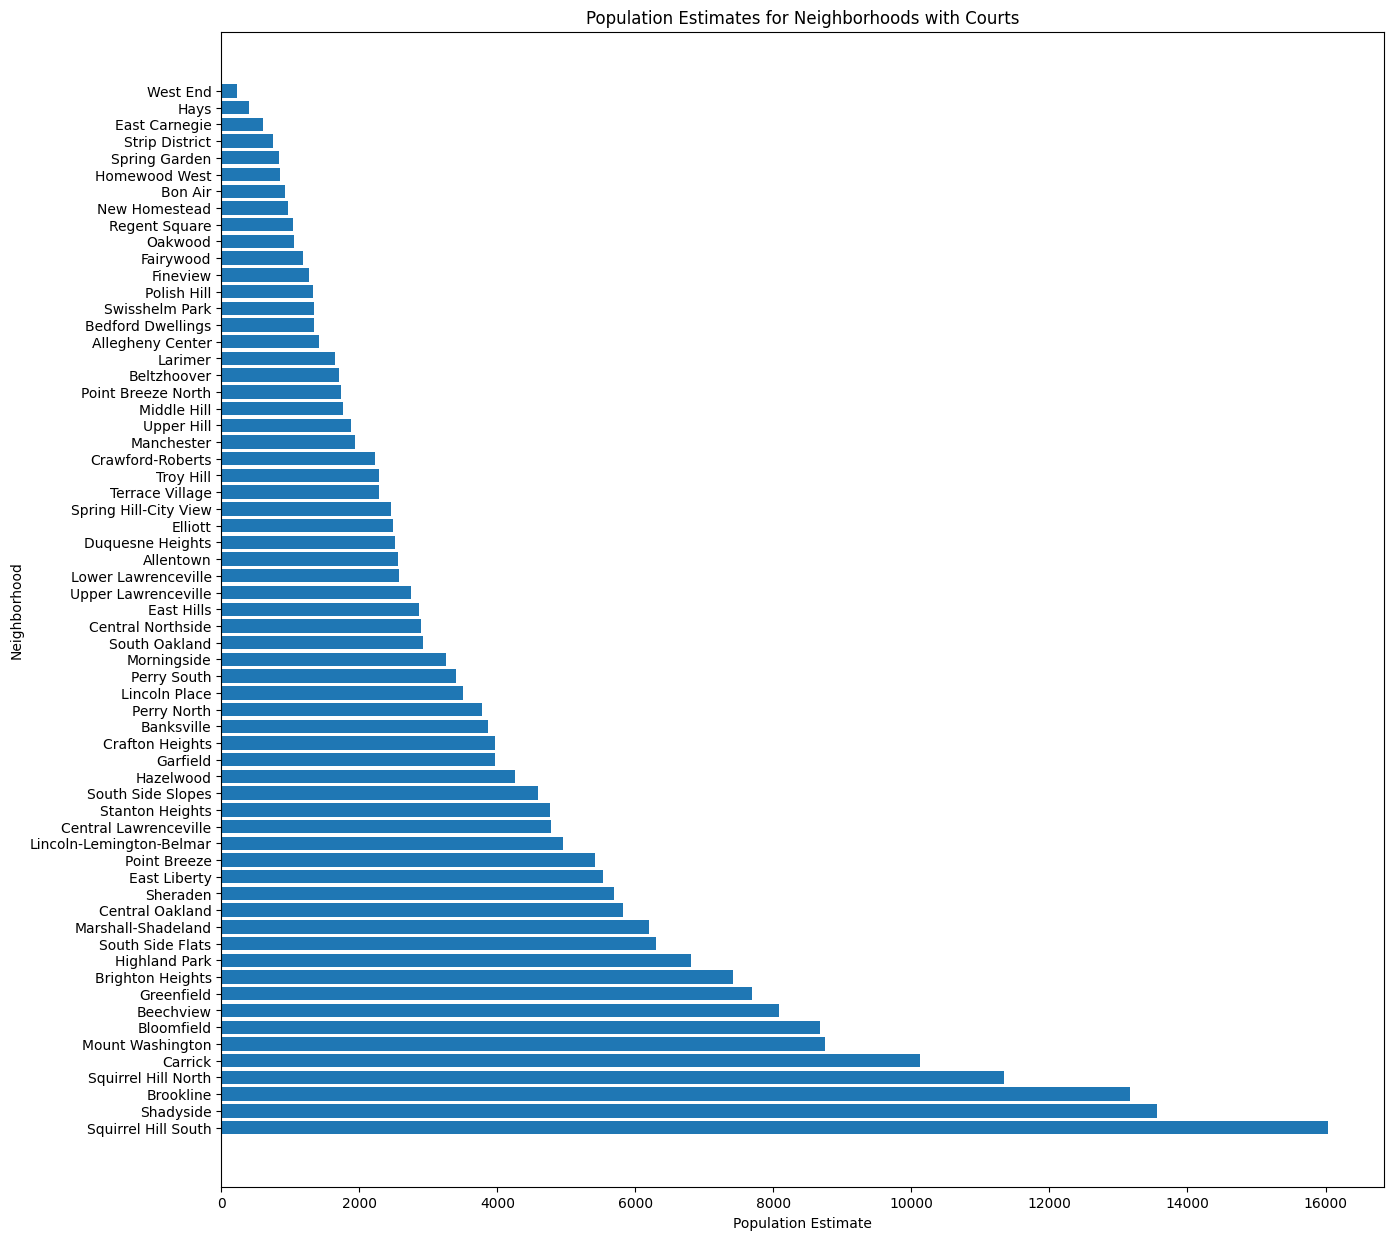

In [ ]:
# filter to only show neighborhoods with courts/rinks
neighborhoods = courts['neighborhood'].unique()
new_neighborhood = population[population['Neighborhood'].isin(neighborhoods)]
# sort in descending order
new_neighborhood = new_neighborhood.sort_values(by='Estimate; Total', ascending=False)

plt.figure(figsize=(15, 15))
# bar graph
plt.barh(new_neighborhood['Neighborhood'], new_neighborhood['Estimate; Total'])

plt.xlabel('Population Estimate')
plt.ylabel('Neighborhood')
plt.title('Population Estimates for Neighborhoods with Courts')
plt.show()

Next, we calculate the population per court by dividing the total neighborhood population by the number of courts.

In [ ]:
num_courts = courts.groupby('neighborhood')['park'].count().reset_index()
num_courts.columns = ['Neighborhood', 'Total Courts']

conclusion = population.merge(num_courts, on='Neighborhood', how='inner')

# Finds the population per court by diving the total population by the number of courts
conclusion['Population per Court'] = conclusion['Estimate; Total'] / conclusion['Total Courts']
conclusion['Population per Court'] = conclusion['Population per Court'].round(2)

# Sorts the data in ascending order
conclusion = conclusion.sort_values(by='Population per Court', ascending=True)
conclusion.to_csv("PPC.csv", index=False)

print(conclusion[['Neighborhood', 'Estimate; Total', 'Total Courts', 'Population per Court']])

             Neighborhood  Estimate; Total  Total Courts  Population per Court
62               West End            235.0             2                117.50
0        Allegheny Center           1411.0             9                156.78
45          Regent Square           1033.0             6                172.17
5             Beltzhoover           1702.0             9                189.11
59              Troy Hill           2283.0             8                285.38
..                    ...              ...           ...                   ...
11  Central Lawrenceville           4775.0             1               4775.00
13        Central Oakland           5822.0             1               5822.00
34     Marshall-Shadeland           6195.0             1               6195.00
46              Shadyside          13562.0             2               6781.00
53    Squirrel Hill North          11336.0             1              11336.00

[63 rows x 4 columns]


Then, we plot another bar graph to clearly demonstrate the data of population per court.

This graph allows us to easily compare each neighborhoods' population per court. We are mainly interested in neighborhoods with lower population per court.

Text(0.5, 1.0, 'Population Per Court In Each Neighborhood')

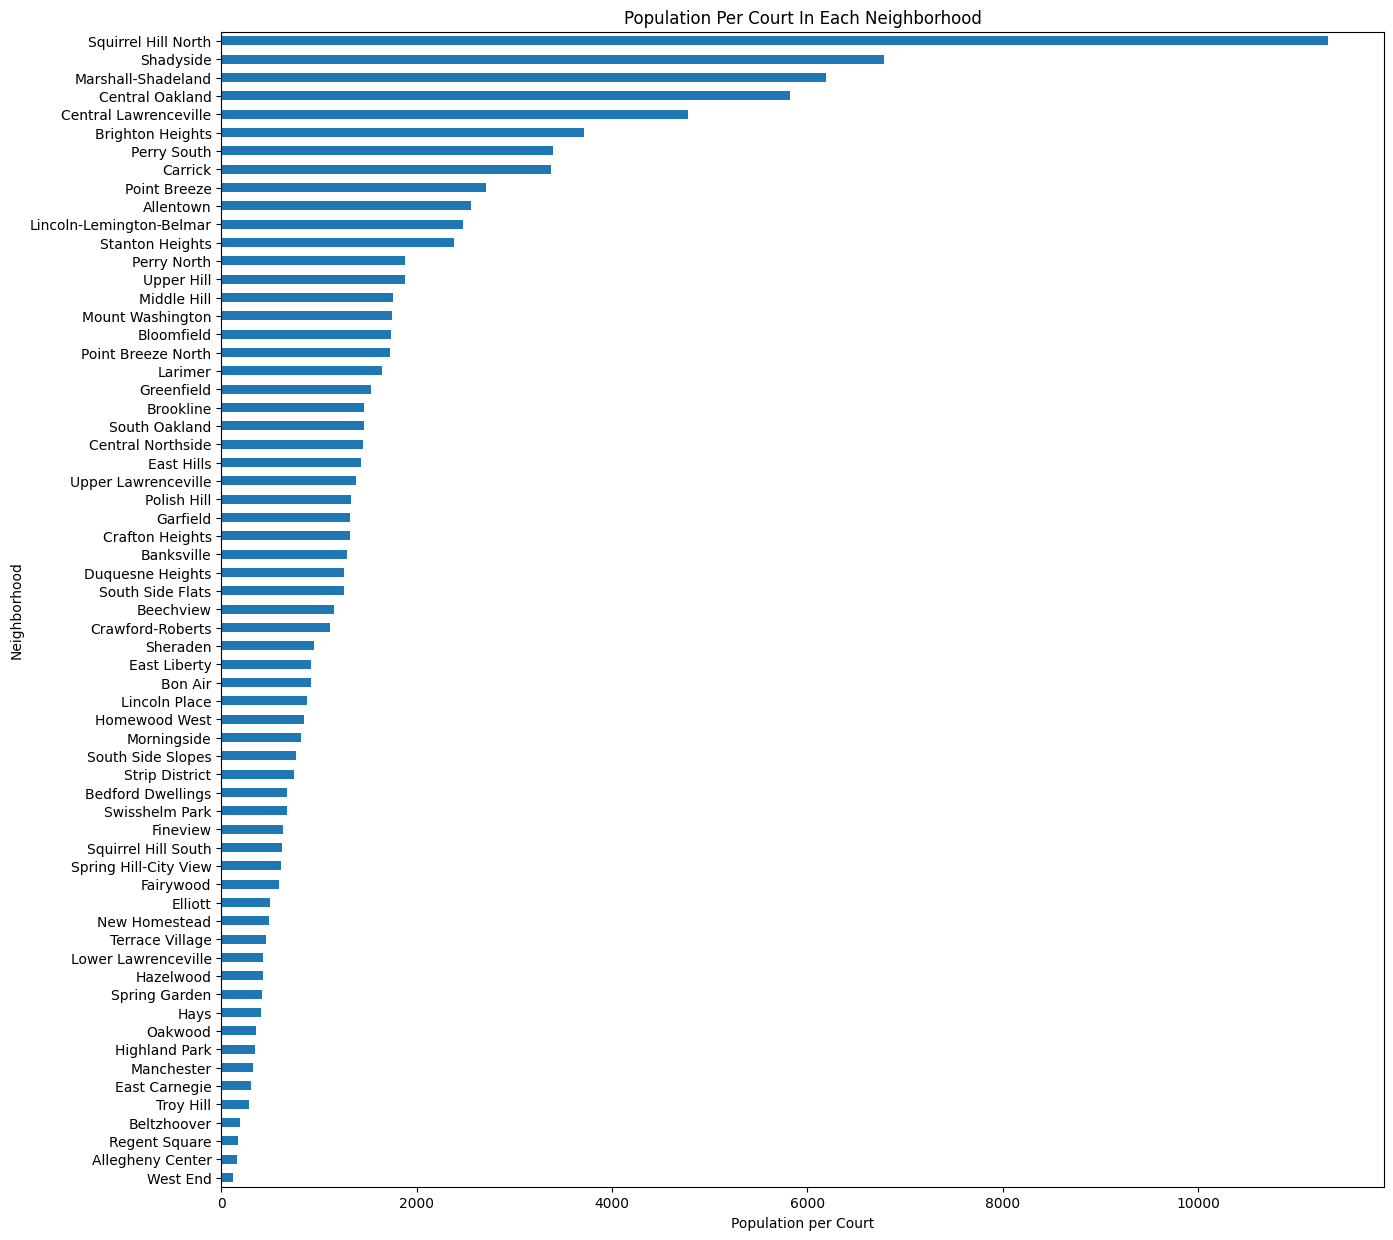

In [ ]:
ppc = conclusion.plot.barh(x="Neighborhood", y="Population per Court", figsize=(15,15), legend=None)

plt.xlabel('Population per Court')
plt.title('Population Per Court In Each Neighborhood')

Now, we can break it down even more to look at the top ten neighborhoods with the lowest population per court ratio.

Text(0.5, 1.0, 'Population Per Court In Each Neighborhood')

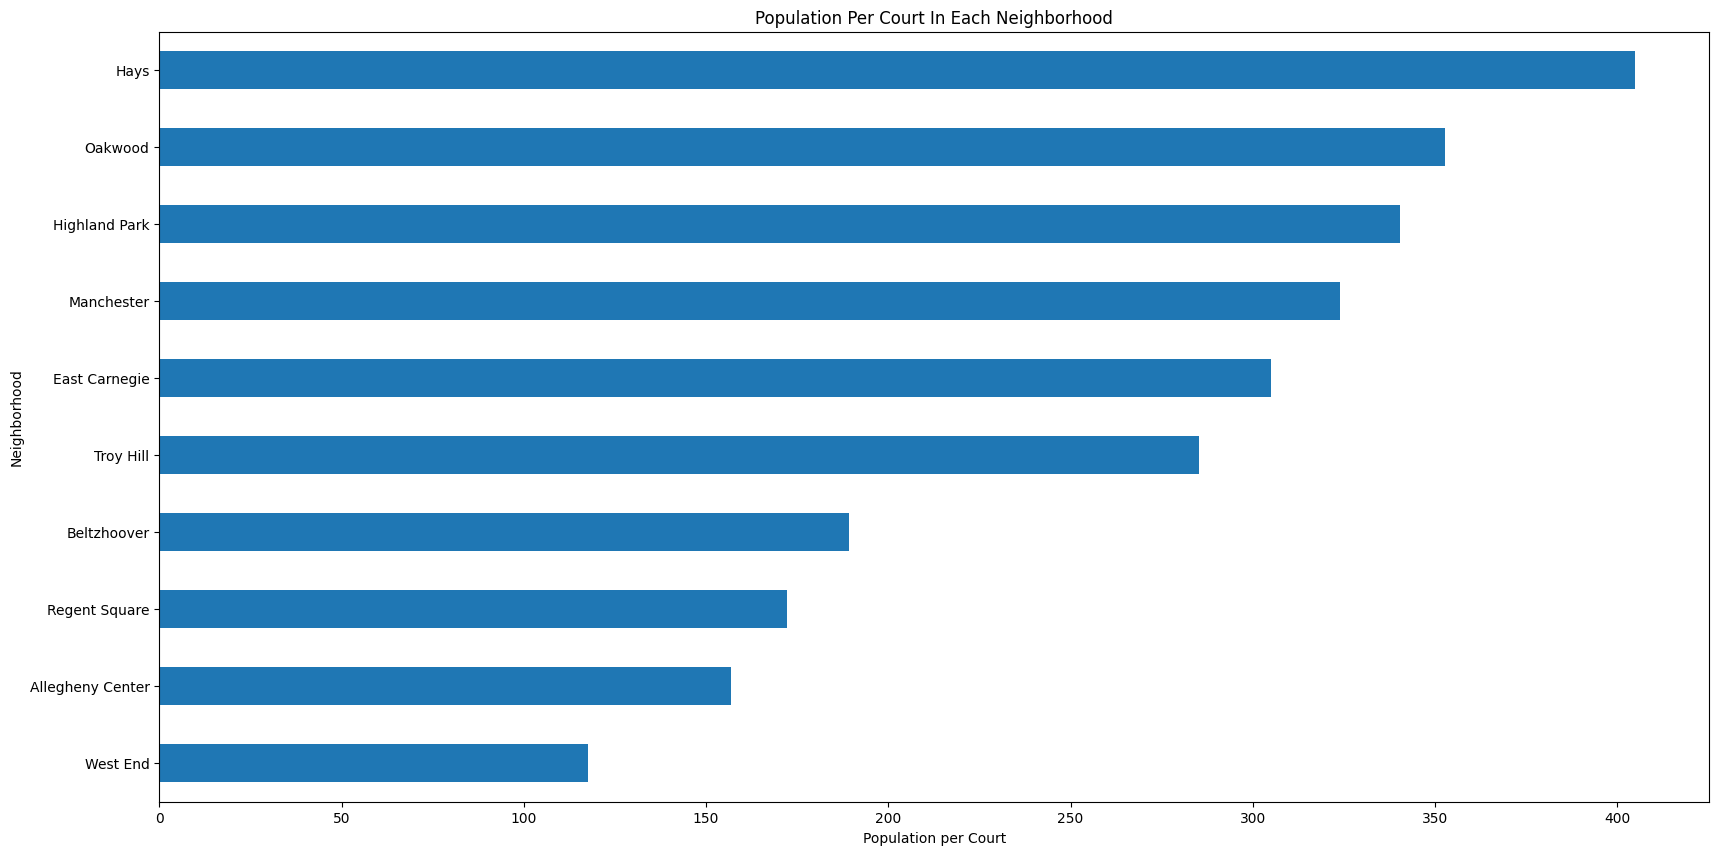

In [ ]:
conclusion = conclusion.sort_values(by='Population per Court', ascending=True)
lowest = conclusion.head(10)
ppc = lowest.plot.barh(x="Neighborhood", y="Population per Court", figsize=(20,10), legend=None)
plt.xlabel('Population per Court')
plt.title('Population Per Court In Each Neighborhood')

After analyzing each neighborhood based on each of their populations per court, we have decided that the best neighborhood must be one of the following neighborhoods:

* West End
* Allegheny Center
* Regent Square
* Beltzhoover
* Troy Hill
* East Carnegie
* Manchester
* Highland Park
* Oakwood
* Hays

From here, we can see that West End has the lowest population per court, indicating that it is probably one of the happpiest neighborhoods in Pittsburgh.

# **Facility**
##### Bairun Chen

Here, we can see each neighborhood's total population and facilities.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

city_facilities_data = pd.read_csv("city_facilities.csv")

city_facilities_neighborhoods = city_facilities_data["neighborhood"]

population_data = []
with open("population.csv", "r") as file:
    next(file)
    for line in file:
        parts = line.strip().split(",")
        neighborhood = parts[1]
        estimate_total = parts[3]
        population_data.append([neighborhood, int(float(estimate_total))])
population_data = pd.DataFrame(population_data, columns=["Neighborhood", "Estimate Total"])

overlapping_neighborhoods = set(city_facilities_neighborhoods).intersection(population_data["Neighborhood"])

filtered_population_data = population_data[population_data["Neighborhood"].isin(overlapping_neighborhoods)]
filtered_facilities_data = city_facilities_data[city_facilities_data["neighborhood"].isin(overlapping_neighborhoods)]

facilities_count = filtered_facilities_data["neighborhood"].value_counts().reset_index()
facilities_count.columns = ["Neighborhood", "Facility Count"]

print(filtered_population_data)
print(facilities_count)


           Neighborhood  Estimate Total
0      Allegheny Center            1411
1        Allegheny West             343
2             Allentown            2558
5            Banksville            3858
6     Bedford Dwellings            1349
..                  ...             ...
86  Upper Lawrenceville            2754
87             West End             235
88         West Oakland            1717
89             Westwood            3537
90              Windgap            1534

[75 rows x 2 columns]
           Neighborhood  Facility Count
0         Highland Park              30
1   Squirrel Hill South              29
2           Perry North              20
3             Brookline              19
4        Strip District              15
..                  ...             ...
70             Fineview               1
71            Fairywood               1
72      Crafton Heights               1
73              Bon Air               1
74          Middle Hill               1

[75 rows x 2 col

Next, we divided the total population by facility count to find the number of peopler per facility in each neighborhood. The datas are shown below in bar graph.

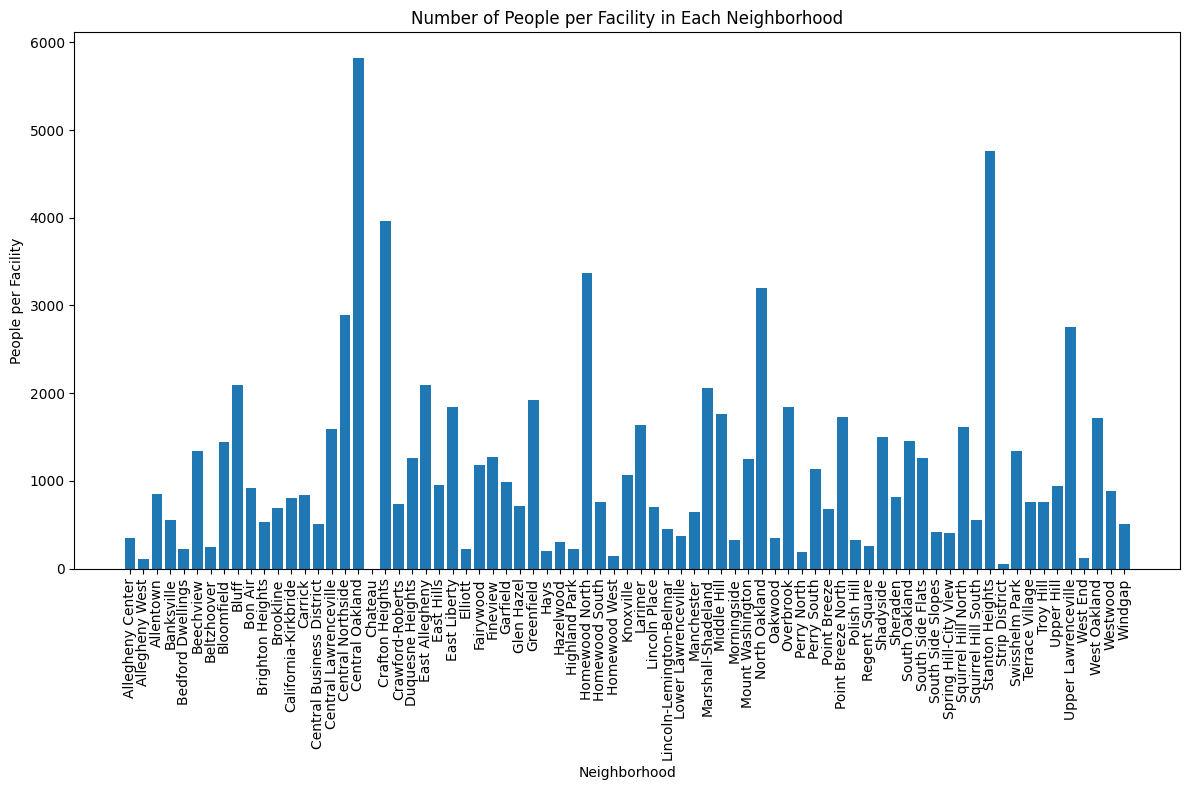

In [ ]:
facilities_count_df = pd.DataFrame(facilities_count, columns=["Neighborhood", "Facility Count"])
merged_data = pd.merge(filtered_population_data, facilities_count_df, on="Neighborhood")


merged_data["People per Facility"] = merged_data["Estimate Total"] / merged_data["Facility Count"]

plt.figure(figsize=(12, 8))
plt.bar(merged_data["Neighborhood"], merged_data["People per Facility"])
plt.xlabel("Neighborhood")
plt.ylabel("People per Facility")
plt.title("Number of People per Facility in Each Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

merged_data.to_csv("PPF.csv", index=False)


Now we sort our data to show the top ten neighborhoods with the fewest people per facility ratio.

In [ ]:

sorted_data = merged_data.sort_values(by="People per Facility", ascending=True)


top_10_neighborhoods = sorted_data.head(10)

print("Top 10 Neighborhoods with Most People per Facility:")
print(top_10_neighborhoods)


top_10_neighborhoods.to_csv("Top10_PPF.csv", index=False)




Top 10 Neighborhoods with Most People per Facility:
         Neighborhood  Estimate Total  Facility Count  People per Facility
18            Chateau               3               3             1.000000
65     Strip District             747              15            49.800000
1      Allegheny West             343               3           114.333333
71           West End             235               2           117.500000
36      Homewood West             850               6           141.666667
50        Perry North            3771              20           188.550000
31               Hays             405               2           202.500000
4   Bedford Dwellings            1349               6           224.833333
25            Elliott            2491              11           226.454545
33      Highland Park            6810              30           227.000000


#Park
#### Brian Lee

The metric I used to determine the happiness of a neighborhood is the number of parks. The logic behind this choice is that parks provide spaces for recreation, relaxation, and social interaction, all of which contribute to residents' well-being. More parks often mean greater opportunities for outdoor activities and community engagement, fostering a happier and healthier environment.

To start off, lets first import all fo the libraries that we will need



In [ ]:
#read and display park data
parks = pd.read_csv("sample_data/city_parks.csv")
parks.head(5)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,28-Apr,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,1-Feb,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,20-Jan,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,7-Jan,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,20-Jan,40.447184,-80.002907


The data set has a lot of different information but for our purposes we only needed the name of the neighborhood for each park



In [ ]:
parks[[ 'neighborhood']].head(10)


,neighborhood
0,Beechview
1,Crawford-Roberts
2,North Shore
3,Allegheny Center
4,North Shore
5,Central Business District
6,Central Northside
7,Beechview
8,East Liberty
9,Bedford Dwellings


Now lets count how many parks there are in total for each neighborhood



In [ ]:
num_parks = parks.groupby('neighborhood')['type'].count().reset_index()
num_parks.columns = ['Neighborhood', 'Total_Parks']
num_parks = num_parks.sort_values(by='Total_Parks', ascending=False)

print(num_parks)

                 Neighborhood  Total_Parks
22               East Liberty           12
13  Central Business District           10
5                   Beechview            8
50               Point Breeze            7
57          South Side Slopes            7
..                        ...          ...
34              Homewood West            1
47                    Oakwood            1
41                Middle Hill            1
45              North Oakland            1
72                    Windgap            1

[73 rows x 2 columns]


This is great, but it is a bit hard to visualize so let's graph it out



Text(0.5, 1.0, 'Total Parks per Neighborhood')

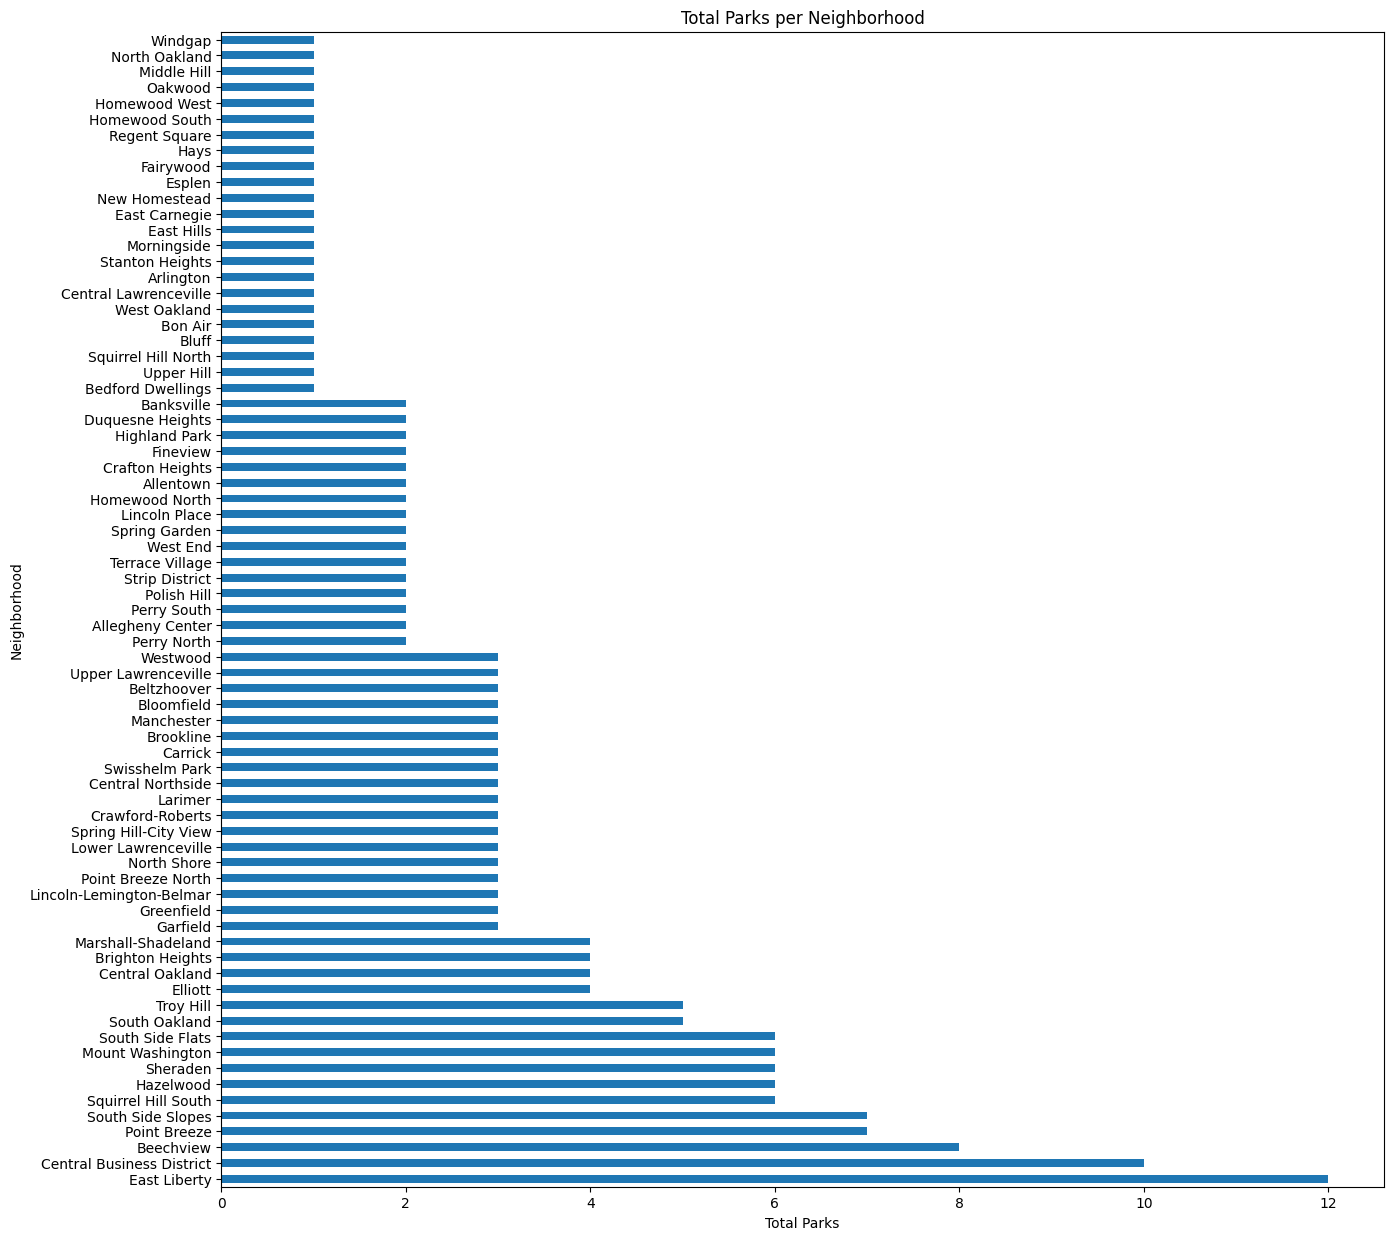

In [ ]:
graph = num_parks.plot.barh(x="Neighborhood", y="Total_Parks", figsize=(15,15), legend=None)
plt.xlabel('Total Parks')
plt.title('Total Parks per Neighborhood')

So now we see that neighborhoods such as East Liberty, Central Buisiness District, and Beechview have the most parks. But this isn't a great metric to use as some of these neighborhoods are larger than the others. So let's use the population of each neighborhood and compare them to the number of parks.

In [ ]:
population = pd.read_csv("sample_data/population.csv")
population[['Neighborhood', 'Estimate; Total']].head(15)

,Neighborhood,Estimate; Total
0,Allegheny Center,1411.0
1,Allegheny West,343.0
2,Allentown,2558.0
3,Arlington,1852.0
4,Arlington Heights,272.0
5,Banksville,3858.0
6,Bedford Dwellings,1349.0
7,Beechview,8078.0
8,Beltzhoover,1702.0
9,Bloomfield,8669.0


To do this we have to merge the data together and do some calculations. But the data right now is still kind of messy, so we clean the data by renaming the columns to be the same and standardize the neighborhood column.



In [ ]:
# Rename columns for consistency
population.rename(columns={'Estimate; Total': 'Population'}, inplace=True)
num_parks.rename(columns={'Total_Parks': 'Total Parks'}, inplace=True)

# Standardize Neighborhood column
population['Neighborhood'] = population['Neighborhood'].str.strip().str.lower()
num_parks['Neighborhood'] = num_parks['Neighborhood'].str.strip().str.lower()

merged_data = pd.merge(population, num_parks, on='Neighborhood', how='inner')

Now that the data is cleaned we can merge the population and park data together to get a metric of people per park in a neighborhood and the neighborhood with the least people per park will be the best neighborhood in pittsburgh.



In [ ]:
# Calculate People per Park
merged_data['People per Park'] = merged_data['Population'] / merged_data['Total Parks']

# Sort data by 'People per Park' in descending order
ranked_data = merged_data[['Neighborhood', 'People per Park']].sort_values(by='People per Park', ascending=False)

# Display the ranked DataFrame
print(ranked_data)

             Neighborhood  People per Park
60    squirrel hill north     11336.000000
45          north oakland      9602.000000
8                   bluff      6294.000000
14  central lawrenceville      4775.000000
62        stanton heights      4761.000000
..                    ...              ...
29                   hays       405.000000
63         strip district       373.500000
24                 esplen       309.000000
69               west end       117.500000
46            north shore        68.333333

[73 rows x 2 columns]


Now lets visualize this

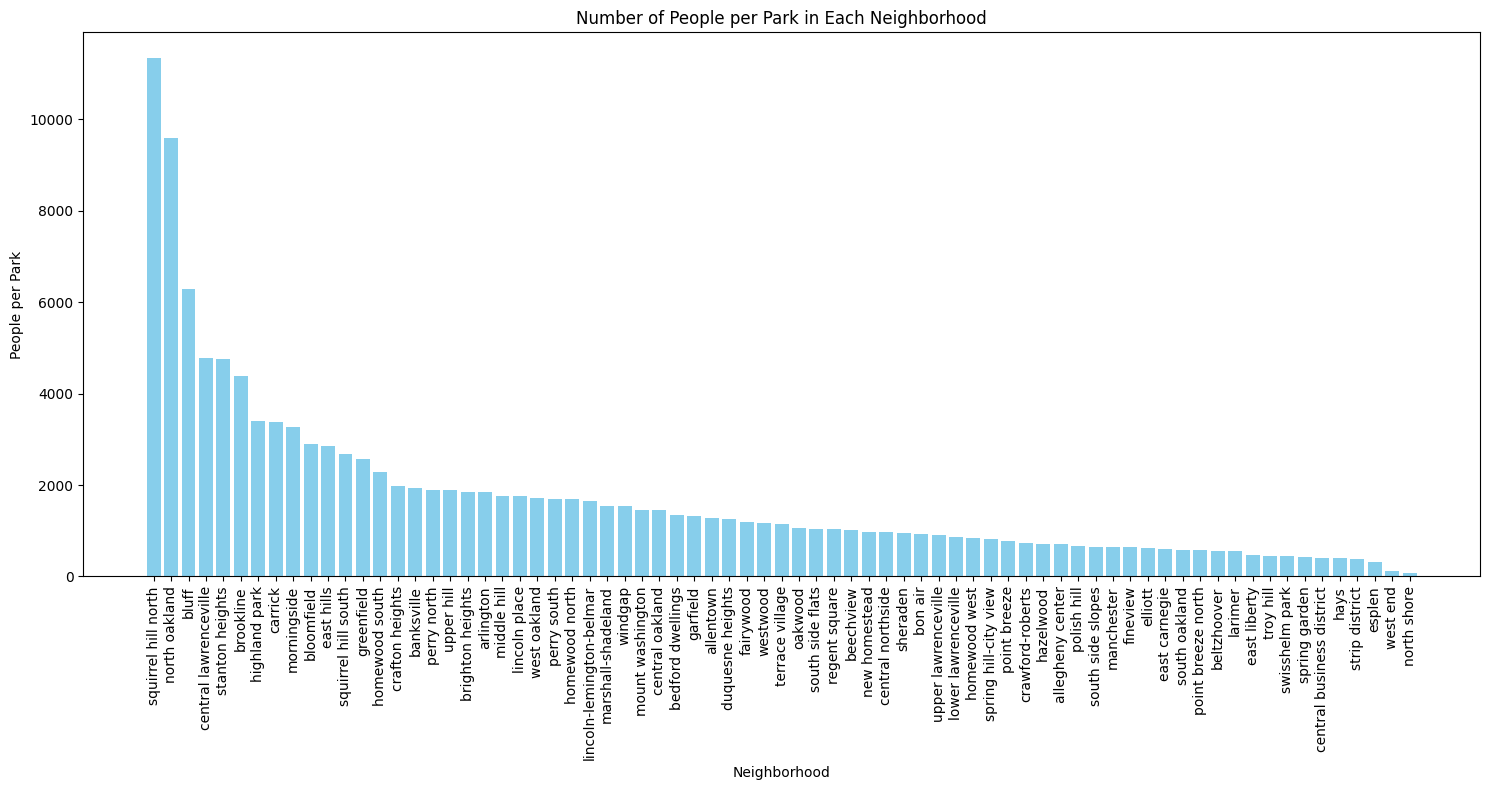

In [ ]:
# Sort for better visualization
merged_data = merged_data.sort_values(by='People per Park', ascending=False)

# Plot
plt.figure(figsize=(15, 8))
plt.bar(merged_data['Neighborhood'], merged_data['People per Park'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('People per Park')
plt.title('Number of People per Park in Each Neighborhood')
plt.tight_layout()
plt.show()

And voila! we have a sorted chart of the neighborhoods with the least ammount of people per park.


Here is a ranking of the top ten neighborhoods according to this metric.

1. North Shore
2. West End
3. Esplen
4. Strip District
5. Hays
6. Central Buisiness District
7. Spring Garden
8. Swisshelm park
9. Troy Hill
10. East Liberty

# Conclusion #

Now that we are done with each submetric, to make them easier to see, we have them each visualized here as a map, with the darker areas having a higher score according to each metric.

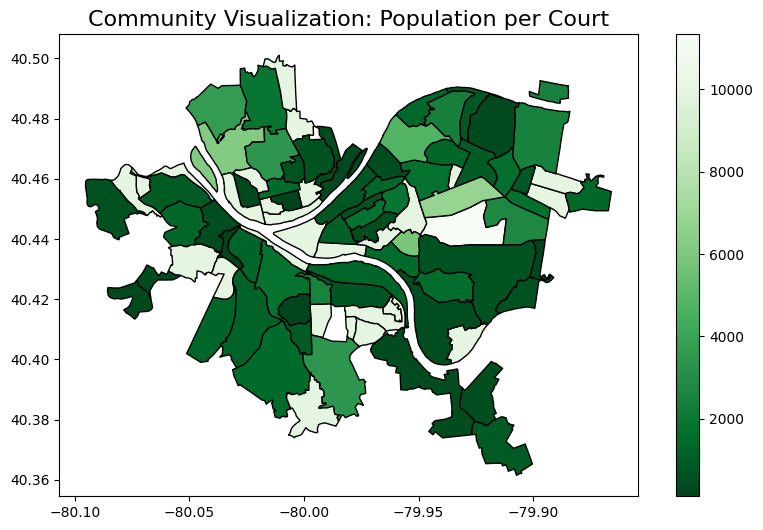

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


geo_data = gpd.read_file('Neighborhoods_.geojson')
csv_data = pd.read_csv('PPC.csv')


csv_data = csv_data.sort_values(by="Neighborhood")

csv_data['Neighborhood'] = csv_data['Neighborhood'].str.title()

merged_data = geo_data.merge(csv_data, left_on='hood', right_on='Neighborhood', how='left')

merged_data['Population per Court'] = merged_data['Population per Court'].fillna(10000)



fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(
    column='Population per Court',
    ax=ax,
    legend=True,
    cmap='Greens_r',
    edgecolor='black'
)

plt.title('Community Visualization: Population per Court', fontsize=16)
plt.show()


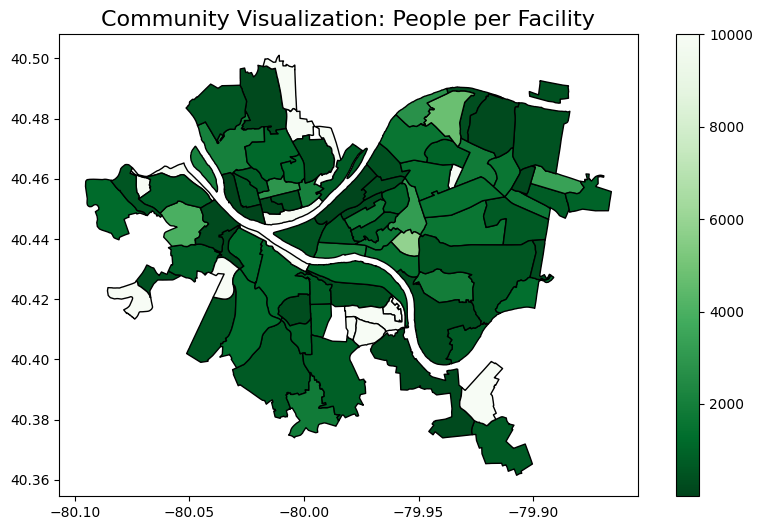

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


geo_data = gpd.read_file('Neighborhoods_.geojson')


csv_data = pd.read_csv('PPF.csv')

csv_data = csv_data.sort_values(by="Neighborhood")

csv_data['Neighborhood'] = csv_data['Neighborhood'].str.title()

merged_data = geo_data.merge(csv_data, left_on='hood', right_on='Neighborhood', how='left')

merged_data['People per Facility'] = merged_data['People per Facility'].fillna(10000)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(
    column='People per Facility',
    ax=ax,
    legend=True,
    cmap='Greens_r',
    edgecolor='black'
)

plt.title('Community Visualization: People per Facility', fontsize=16)

plt.show()

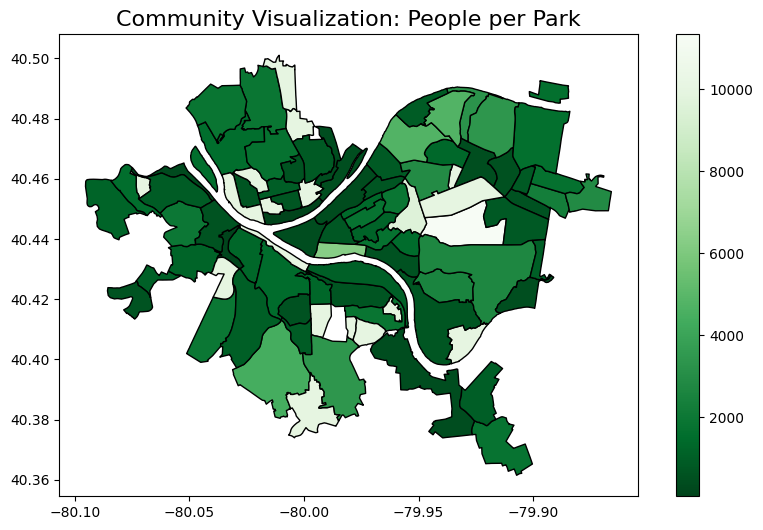

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


geo_data = gpd.read_file('Neighborhoods_.geojson')
csv_data = pd.read_csv('PPP.csv')


csv_data = csv_data.sort_values(by="Neighborhood")

csv_data['Neighborhood'] = csv_data['Neighborhood'].str.title()

merged_data = geo_data.merge(csv_data, left_on='hood', right_on='Neighborhood', how='left')

merged_data['People per Park'] = merged_data['People per Park'].fillna(10000)



fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(
    column='People per Park',
    ax=ax,
    legend=True,
    cmap='Greens_r',
    edgecolor='black'
)

plt.title('Community Visualization: People per Park', fontsize=16)
plt.show()


We then combined them together, giving slightly lower weights to courts/rinks and parks as the courts/rinks tend to be located within a park, making some of the "happiness" measured overlap each other.

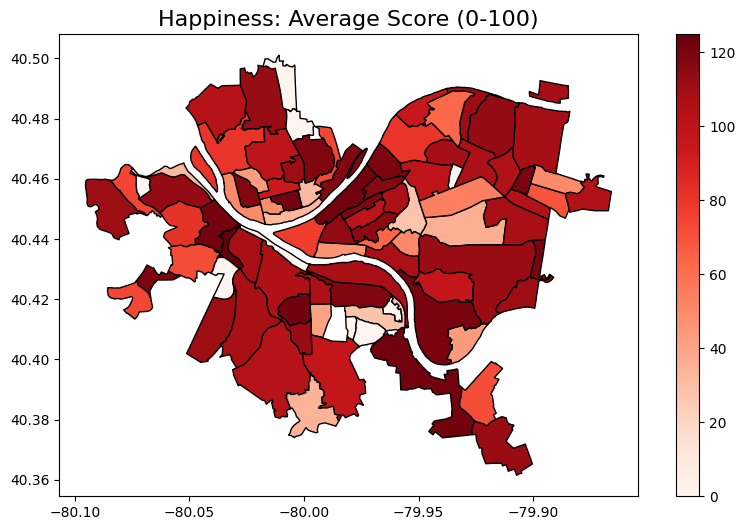

Processed data saved to 'Processed_Merged_Data_with_Scores.csv'


In [ ]:
wimport geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

geo_data = gpd.read_file('Neighborhoods_.geojson')
ppf_data = pd.read_csv('PPF.csv')
ppp_data = pd.read_csv('PPP.csv')
ppc_data = pd.read_csv('PPC.csv')

geo_data['hood'] = geo_data['hood'].str.strip().str.title()
ppf_data['Neighborhood'] = ppf_data['Neighborhood'].str.strip().str.title()
ppp_data['Neighborhood'] = ppp_data['Neighborhood'].str.strip().str.title()
ppc_data['Neighborhood'] = ppc_data['Neighborhood'].str.strip().str.title()


merged_data = geo_data.merge(ppf_data, left_on='hood', right_on='Neighborhood', how='left') \
                      .merge(ppp_data, left_on='hood', right_on='Neighborhood', how='left') \
                      .merge(ppc_data, left_on='hood', right_on='Neighborhood', how='left')

unmatched_rows = merged_data[merged_data['Neighborhood'] == 0]
if not unmatched_rows.empty:
    print("Unmatched rows detected. Please review the data:")
    print(unmatched_rows)


numeric_columns = merged_data.select_dtypes(include=['float', 'int']).columns
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(0)

columns_to_score = {
    'People per Facility': {'count_col': 'Facility Count', 'weight': 1.5},
    'People per Park': {'count_col': 'Total Parks', 'weight': 1.0},
    'Population per Court': {'count_col': 'Total Courts', 'weight': 1.3}
}

# 计算评分
for col, config in columns_to_score.items():
    count_col = config['count_col']
    weight = config['weight']

    # 如果 count 为 0，分数直接为 0
    merged_data[f'{col} Score'] = merged_data.apply(
        lambda row: 0 if row[count_col] == 0 else (1 - (row[col] / merged_data[col].max())) * 100 * weight,
        axis=1
    )
merged_data['Average Score'] = merged_data[[f'{col} Score' for col in columns_to_score]].mean(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(
    column='Average Score',
    ax=ax,
    legend=True,
    cmap='Reds',
    edgecolor='black'
)
plt.title('Happiness: Average Score (0-100)', fontsize=16)
plt.show()

output_file = "Processed_Merged_Data_with_Scores.csv"
merged_data.to_csv(output_file, index=False)
print(f"Processed data saved to '{output_file}'")


Top 10 Neighborhoods by Average Score:
1. OBJECTID 58: West End with Average Score: 124.86
2. OBJECTID 82: Strip District with Average Score: 122.29
3. OBJECTID 26: Hays with Average Score: 122.19
4. OBJECTID 27: Beltzhoover with Average Score: 122.19
5. OBJECTID 88: Elliott with Average Score: 120.99
6. OBJECTID 46: Allegheny Center with Average Score: 120.96
7. OBJECTID 86: Regent Square with Average Score: 120.75
8. OBJECTID 61: Hazelwood with Average Score: 120.34
9. OBJECTID 43: Homewood West with Average Score: 119.70
10. OBJECTID 20: Lower Lawrenceville with Average Score: 119.35


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


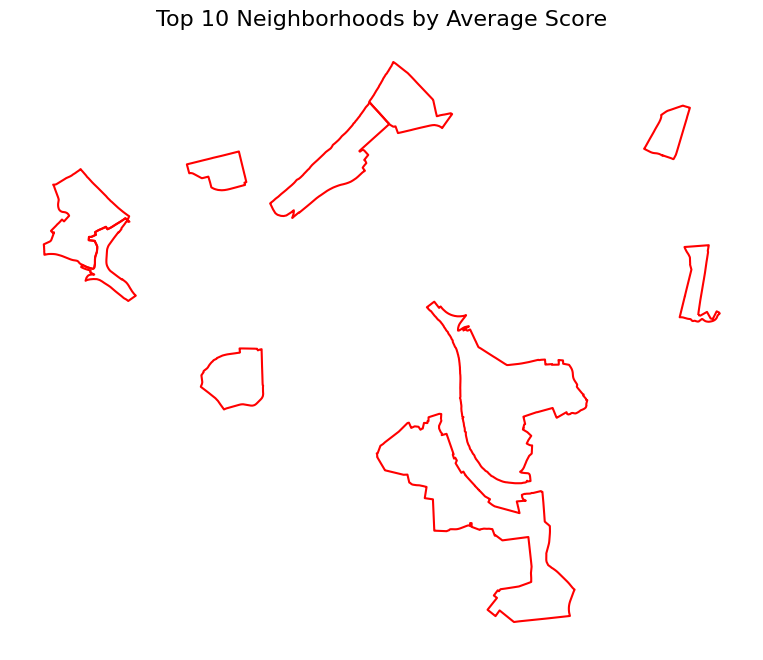

Saved top 10 neighborhoods to 'Top10_Neighborhoods.csv'


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

geo_data = gpd.read_file('Neighborhoods_.geojson')
csv_data = pd.read_csv('Neighborhoods_.csv')

top_10_neighborhoods = merged_data.sort_values(by='Average Score', ascending=False).head(10)

top_10_ids = top_10_neighborhoods['OBJECTID'].tolist()

print("Top 10 Neighborhoods by Average Score:")
top_10_hoods = []
for rank, obj_id in enumerate(top_10_ids, start=1):
    row = csv_data[csv_data['OBJECTID'] == obj_id]
    if not row.empty:
        hood_name = row.iloc[0]['hood']
        average_score = top_10_neighborhoods[top_10_neighborhoods['OBJECTID'] == obj_id]['Average Score'].values[0]
        top_10_hoods.append(hood_name)
        print(f"{rank}. OBJECTID {obj_id}: {hood_name} with Average Score: {average_score:.2f}")
    else:
        print(f"{rank}. OBJECTID {obj_id}: Not Found")
        top_10_hoods.append("Not Found")

geo_data_matched = geo_data[geo_data['OBJECTID'].isin(top_10_ids)]
geo_data_matched['hood'] = top_10_hoods

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

geo_data_matched.boundary.plot(ax=ax, edgecolor='red')

plt.title("Top 10 Neighborhoods by Average Score", fontsize=16)
plt.axis('off')
plt.show()

output_file = "Top10_Neighborhoods.csv"
geo_data_matched[['OBJECTID', 'hood']].to_csv(output_file, index=False)
print(f"Saved top 10 neighborhoods to '{output_file}'")


So after this project, our group has concluded that West End is the Best neighborhood in Pittsburgh as it scored highest in terms of its happiness.

## Reflections

Vincent: Since I'm not from Pittsburgh, I'm not very familiar with all the neighborhoods. Through our analysis, West End was not only ranked first in all the datasets combined, but it was also among the top neighborhoods in all three metrics. In conclusion, I would stick to the result from our datasets, and I believe West End is probably the happiest neighborhood in the city.

Brian: In my portion, according to my metric North Shore was the best while with our datasets combined West End was the best. As I am not a pitsburgh native, going to this I didn't have a neighborhood that I thought would be the best, so it was intersting for me to see what neighborhood was the best according to our datasets.

For our metric we focused mostly on the happiness of the neighborhoods to determine the best neighborhood, but it would be interesting in the future to see what other data such as the crime rate, housing prices, etc. may say instead. I am also curious if residents of West End took a poll if they would identify their neighborhood as a "happy" one or not.

Bairun:
In my analysis, I identified the neighborhoods in Pittsburgh with the fewest number of people per facility, indicating greater resource accessibility for individual residents. Chateau ranks first, with only 1.00 person per facility, followed by Strip District and Allegheny West, with 49.80 and 114.33 people per facility, respectively. These results highlight neighborhoods where residents have the highest access to public resources.

This metric offers an alternative perspective on “bestness” by focusing on resource availability rather than overall demand. It underscores the importance of ensuring equitable access to facilities and provides insights into the community dynamics of Pittsburgh’s neighborhoods.

